# Import

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score
import warnings
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset
!unzip sleep-health-and-lifestyle-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
sleep-health-and-lifestyle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sleep-health-and-lifestyle-dataset.zip
replace Sleep_health_and_lifestyle_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Data Visualization

## Dataset

In [ ]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
df = df.drop('Person ID', axis=1)

In [ ]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Distribution for Categorical Data

These barcharts shows that this dataset contains data that are balance for some categories and imbalance data for other categories

<Axes: xlabel='Gender', ylabel='count'>

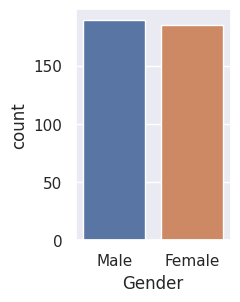

In [ ]:
sns.set(rc={'figure.figsize':(2,3)})
sns.set(font_scale=1)
sns.countplot(x = df['Gender'])

<Axes: xlabel='Quality of Sleep', ylabel='count'>

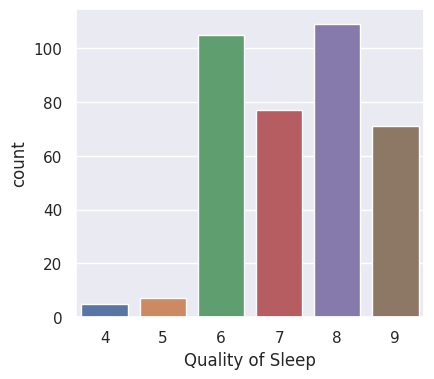

In [ ]:
sns.set(rc={'figure.figsize':(4.5,4)})
sns.countplot(x = df['Quality of Sleep'])

<Axes: xlabel='Occupation', ylabel='count'>

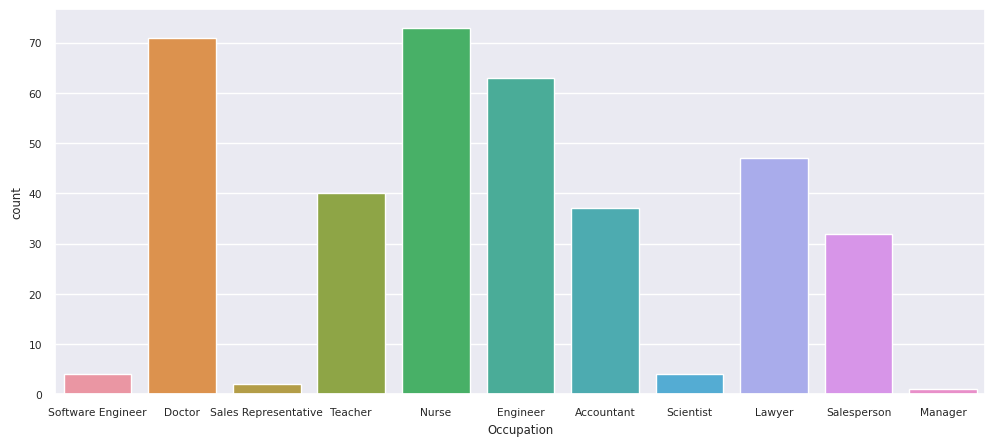

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set(font_scale=0.7)
sns.countplot(x = df['Occupation'])

<Axes: xlabel='BMI Category', ylabel='count'>

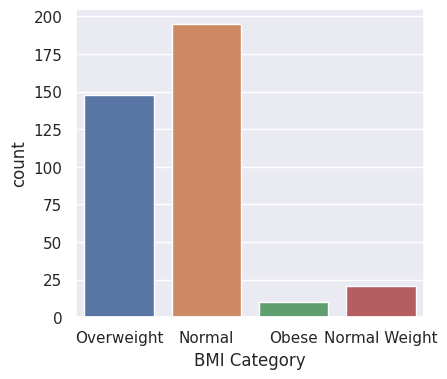

In [ ]:
sns.set(rc={'figure.figsize':(4.5,4)})
sns.set(font_scale=1)
sns.countplot(x = df['BMI Category'])

<Axes: xlabel='Stress Level', ylabel='count'>

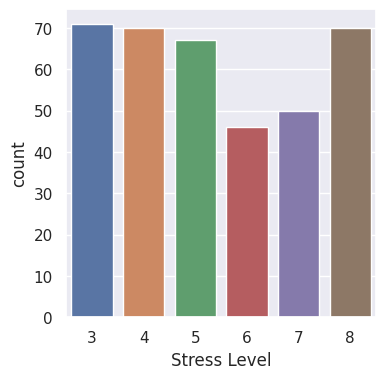

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
sns.set(font_scale=1)
sns.countplot(x = df['Stress Level'])

<Axes: xlabel='Sleep Disorder', ylabel='count'>

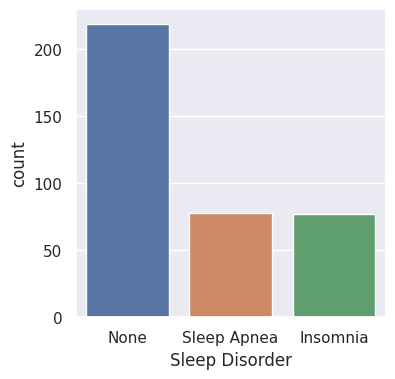

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
sns.set(font_scale=1)
sns.countplot(x = df['Sleep Disorder'])

##Histogram of Numerical Values

In [ ]:
list_histogram = ['Age', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']
df_histogram = df[list_histogram]

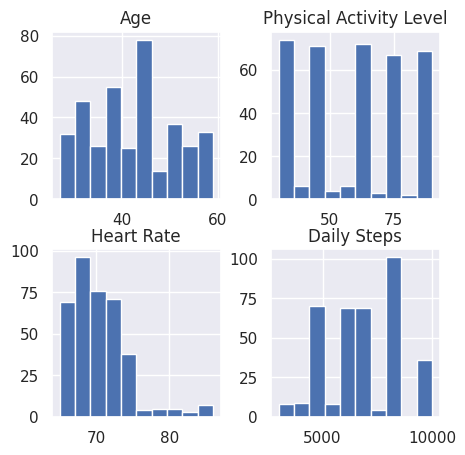

In [ ]:
p = df_histogram.hist(figsize = (5,5))

## Histogram of all Features compared with Sleep Disorders

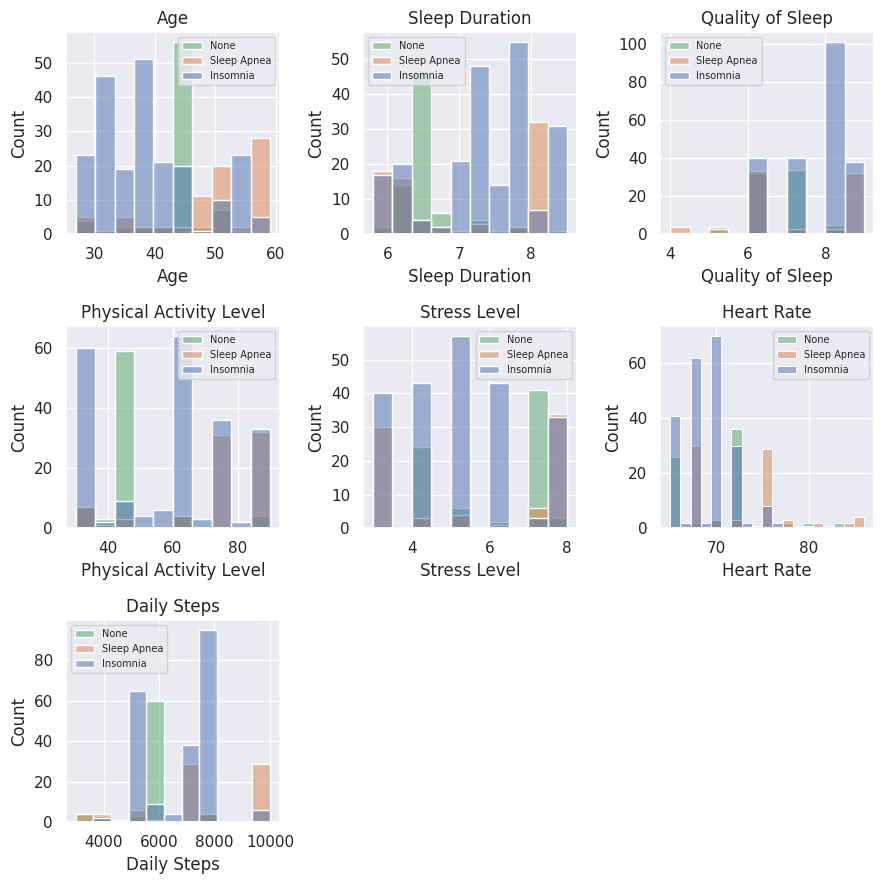

In [ ]:
fig = plt.figure(figsize=(9,9))

columns_to_plot=['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

for i in range(len(columns_to_plot)):
    plt.subplot(3,3,i+1)
    plt.title(columns_to_plot[i])
    sns.histplot(data=df,x=df[columns_to_plot[i]],hue='Sleep Disorder')
    plt.legend(fontsize=7,labels=df['Sleep Disorder'].unique())
plt.tight_layout()
plt.show()

## Correlation Matrix for Quality of Sleep

From this correlation matrix we can tell that Sleep Duration, Stress Level, and Heart Rate have a signficant impact towards Quality of Sleep.

Sleep Duration (0.88 corerlation): Sleep quality is negatively impacted by insufficient or excessive sleep duration, leading to grogginess and energy issues.

Stress Level (-0.9 correlation): It is common sense that people with a high stress level is most likely to have bad sleep quality.

Heart Rate (-0.66 correlation): A person's heart rate lowers as they get more comfortable and deeper into their sleep.

<Axes: >

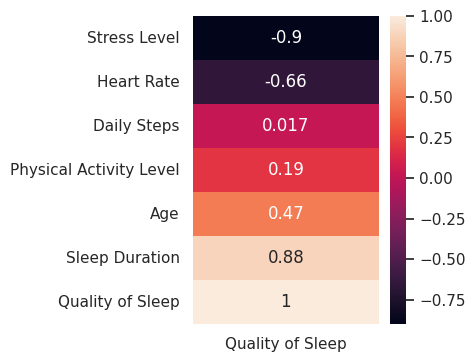

In [ ]:
plt.figure(figsize=(3,4))
corr_matrix = df.corr()
target_corr = corr_matrix['Quality of Sleep'].sort_values(ascending=True)
df_filtered = pd.DataFrame({'Quality of Sleep': target_corr})
sns.heatmap(df_filtered, annot=True)

# Data Pre-Processing

## Data Upsampling

In [ ]:
disorder_counts = df['Sleep Disorder'].value_counts()
n = disorder_counts.max()

for disorder in disorder_counts.index:
  if disorder != 'None':
    disorder_data = df[df['Sleep Disorder'] == disorder]
    disorder_data_upsampled = disorder_data.sample(n-80, replace = True)
    df = pd.concat([df, disorder_data_upsampled])

df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
239,Male,44,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia
194,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
177,Male,42,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
229,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia


<Axes: xlabel='Sleep Disorder', ylabel='count'>

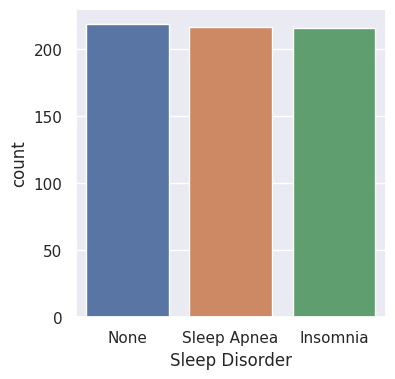

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
sns.set(font_scale=1)
sns.countplot(x = df['Sleep Disorder'])

## Miscategorise Handling

Normal and Normal Weight is suppose to be in the same category

In [ ]:
df['BMI Category'].value_counts()

Overweight       385
Normal           209
Obese             33
Normal Weight     25
Name: BMI Category, dtype: int64

In [ ]:
for index, value in df['BMI Category'].iteritems():
  if value == 'Normal Weight':
    df.at[index, 'BMI Category'] = 'Normal'

df['BMI Category'].value_counts()

Overweight    385
Normal        234
Obese          33
Name: BMI Category, dtype: int64

## Split Blood Pressure to Systolic and Disatolic

It is not efficient to have Blood Pressure as a string. Therefore, transforming it into an integer is a good idea. However, Blood Pressure is written as number1/number2. It is not ethical to divide both numbers because that is not how blood pressures works. Therefore, both of these numbers are split into two columns because each number symbolizes something. Number1 symbolizes Systolic and Number2 symbolizes Diastolic.

In [ ]:
bp = df['Blood Pressure'].values.astype(str)
Systolic, Diastolic = [], []
for idx,val in enumerate(bp):
    Systolic.append(int(str(val).split('/')[0]))
    Diastolic.append(int(str(val).split('/')[1]))

df = df.drop('Blood Pressure',axis=1)
df.insert(7,'Systolic',Systolic)
df.insert(8,'Diastolic',Diastolic)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic,Diastolic,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,126,83,Overweight,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,125,80,Normal,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,125,80,Normal,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,140,90,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,140,90,Obese,85,3000,Sleep Apnea


## Non-numerical Data Encoding

In [ ]:
label_encoder = LabelEncoder()

def auto_encode(column_name, df):
  column_name_encode = str(column_name + '_encoded')
  df[column_name_encode] = label_encoder.fit_transform(df[column_name])

column_to_encode = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]
for column in column_to_encode:
  auto_encode(column, df)
  df = df.drop(column, axis=1)

In [ ]:
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic,Diastolic,Heart Rate,Daily Steps,Gender_encoded,Occupation_encoded,BMI Category_encoded,Sleep Disorder_encoded
0,27,6.1,6,42,6,126,83,77,4200,1,9,2,1
1,28,6.2,6,60,8,125,80,75,10000,1,1,0,1
2,28,6.2,6,60,8,125,80,75,10000,1,1,0,1
3,28,5.9,4,30,8,140,90,85,3000,1,6,1,2
4,28,5.9,4,30,8,140,90,85,3000,1,6,1,2


## Data Splitting

In [ ]:
X = df.drop('Sleep Disorder_encoded', axis = 1)
y = df['Sleep Disorder_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1-Score'])

In [ ]:
def insert_to_df(model, acc, recall, f1):
  global metrics_df
  if model not in list(metrics_df['Model']):
    metrics_df = metrics_df.append({'Model': model, 'Accuracy': acc, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)
  else:
    row_index = metrics_df[metrics_df['Model'] == model].index[0]
    metrics_df.at[row_index, 'Accuracy'] = acc
    metrics_df.at[row_index, 'Recall'] = recall
    metrics_df.at[row_index, 'F1-Score'] = f1

## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
rf_y_pred = y_pred

insert_to_df('Random Forest', acc, recall, f1)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.91      0.98      0.94        52
           2       0.92      0.94      0.93        36

    accuracy                           0.93       131
   macro avg       0.93      0.93      0.93       131
weighted avg       0.93      0.93      0.93       131



## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
dt_y_pred = y_pred

insert_to_df('Decision Tree', acc, recall, f1)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.92      0.92      0.92        52
           2       0.89      0.94      0.92        36

    accuracy                           0.92       131
   macro avg       0.92      0.92      0.92       131
weighted avg       0.92      0.92      0.92       131



## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)

insert_to_df('Gradient Boosting', acc, recall, f1)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.91      0.98      0.94        52
           2       0.92      0.94      0.93        36

    accuracy                           0.93       131
   macro avg       0.93      0.93      0.93       131
weighted avg       0.93      0.93      0.93       131



## Support Vector Classifier

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)

insert_to_df('SVC', acc, recall, f1)

              precision    recall  f1-score   support

           0       0.47      0.93      0.62        43
           1       0.84      0.40      0.55        52
           2       0.86      0.50      0.63        36

    accuracy                           0.60       131
   macro avg       0.72      0.61      0.60       131
weighted avg       0.72      0.60      0.60       131



## K-Nearest Neighbors

In [ ]:
k_value = 3
knn = KNeighborsClassifier(k_value)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
knn_y_pred = y_pred

knn_string = "KNN with K-Value " + str(k_value)
insert_to_df(knn_string , acc, recall, f1)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.91      0.83      0.87        52
           2       0.85      0.94      0.89        36

    accuracy                           0.88       131
   macro avg       0.88      0.89      0.88       131
weighted avg       0.88      0.88      0.88       131



## Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)

insert_to_df('Naive Bayes', acc, recall, f1)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.91      0.92      0.91        52
           2       0.97      0.86      0.91        36

    accuracy                           0.90       131
   macro avg       0.91      0.90      0.90       131
weighted avg       0.90      0.90      0.90       131



## XGBoost

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
xgb_y_pred = y_pred

insert_to_df('XGBoost', acc, recall, f1)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.91      0.98      0.94        52
           2       0.92      0.94      0.93        36

    accuracy                           0.93       131
   macro avg       0.93      0.93      0.93       131
weighted avg       0.93      0.93      0.93       131



## LightGBM

In [ ]:
lgb = lgb.LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)

insert_to_df('LightGBM', acc, recall, f1)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.91      0.98      0.94        52
           2       0.92      0.94      0.93        36

    accuracy                           0.93       131
   macro avg       0.93      0.93      0.93       131
weighted avg       0.93      0.93      0.93       131



## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)
lr_y_pred = y_pred

insert_to_df('Logistic Regression', acc, recall, f1)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.91      0.92      0.91        52
           2       0.87      0.94      0.91        36

    accuracy                           0.91       131
   macro avg       0.91      0.91      0.91       131
weighted avg       0.91      0.91      0.91       131



## AdaBoost

In [ ]:
base = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(base_estimator=base)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

acc = round(accuracy_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred, average='macro'), 2)
f1 = round(f1_score(y_test, y_pred, average='macro'), 2)

insert_to_df('AdaBoost', acc, recall, f1)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.89      0.94      0.92        52
           2       0.88      0.81      0.84        36

    accuracy                           0.87       131
   macro avg       0.87      0.86      0.86       131
weighted avg       0.87      0.87      0.87       131



# Evaluation

In [ ]:
metrics_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,Model,Accuracy,Recall,F1-Score
0,Random Forest,0.93,0.93,0.93
1,Gradient Boosting,0.93,0.93,0.93
2,XGBoost,0.93,0.93,0.93
3,LGBM,0.93,0.93,0.93
4,Decision Tree,0.92,0.92,0.92
5,Logistic Regression,0.91,0.91,0.91
6,Naive Bayes,0.90,0.90,0.90
7,KNN with K-Value 3,0.88,0.89,0.88
8,AdaBoost,0.87,0.86,0.86
9,SVC,0.60,0.61,0.60


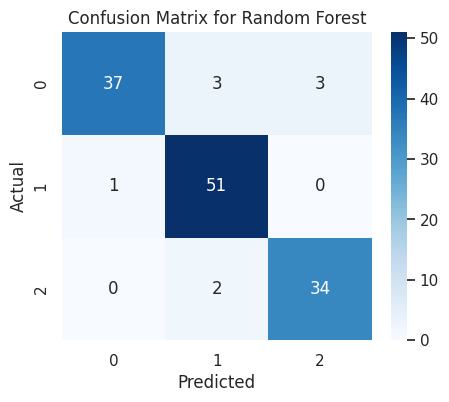

In [ ]:
confusion = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, cmap='Blues')

plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()